In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [59]:
df = pd.read_csv('data/stud.csv')

In [60]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
x = df.drop(columns=['writing score'], axis = 1)

In [62]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [63]:
y = df['writing score']

In [64]:
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing score, Length: 1000, dtype: int64

In [65]:
# create column transfromer with 3 types of transformers

num_features = x.select_dtypes(exclude = 'object').columns
categorical_features = x.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transfromer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, categorical_features),
        ("StandardScaler", numeric_transfromer, num_features)
    ]
)

In [66]:
x = preprocessor.fit_transform(x)

In [67]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [68]:
# creating an evaluate function to give all metrics after model training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [69]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressior":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose = False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # train model

    # make predictions
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    # evaluate Train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_predict)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_predict)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print("- root mean squared error: {:.4f}".format(model_train_rmse))
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('------------------------------------------------')
    
    print("model performance for test set")
    print("- root mean squared error: {:4f}".format(model_test_rmse))
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')
 

Linear Regression
model performance for training set
- root mean squared error: 3.3761
- mean absolute error: 2.7091
- R2 Score: 0.9498
------------------------------------------------
model performance for test set
- root mean squared error: 3.870162
- mean absolute error: 3.2025
- R2 Score: 0.9379


Lasso
model performance for training set
- root mean squared error: 4.5135
- mean absolute error: 3.6478
- R2 Score: 0.9104
------------------------------------------------
model performance for test set
- root mean squared error: 4.925610
- mean absolute error: 3.8964
- R2 Score: 0.8993


Ridge
model performance for training set
- root mean squared error: 3.3740
- mean absolute error: 2.7102
- R2 Score: 0.9499
------------------------------------------------
model performance for test set
- root mean squared error: 3.861173
- mean absolute error: 3.2005
- R2 Score: 0.9381


K-Neighbors Regressior
model performance for training set
- root mean squared error: 4.1250
- mean absolute error: 

In [70]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by = ["r2_score"], ascending = False)

,Model Name,r2_score
2,Ridge,0.938143
0,Linear Regression,0.937854
7,CatBoosting Regressor,0.916795
6,XGBRegressor,0.915462
5,Random Forest Regressor,0.914924
8,AdaBoost Regressor,0.910147
1,Lasso,0.899336
3,K-Neighbors Regressior,0.881183
4,Decision Tree,0.856602


# Linear Regression

In [71]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_predict = lin_model.predict(x_test)
score = r2_score(y_test, y_predict)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 93.79


Text(0, 0.5, 'Predicted')

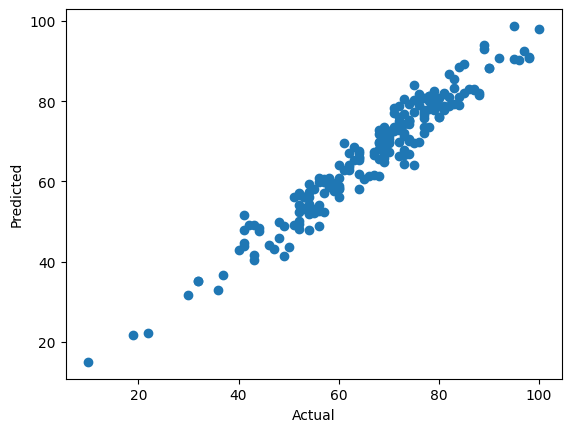

In [75]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='writing score'>

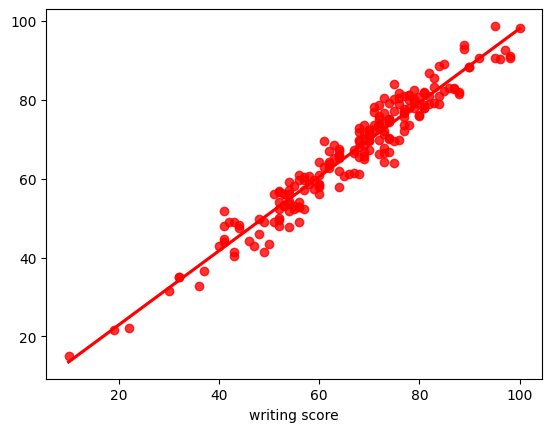

In [73]:
sns.regplot(x=y_test, y=y_predict, ci=None, color='red')

In [77]:
predicted_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict, 'Difference': y_test-y_predict})

In [78]:
predicted_df

,Actual value,Predicted value,Difference
521,84,88.558594,-4.558594
737,73,66.593750,6.406250
740,72,73.609375,-1.609375
660,73,71.398438,1.601562
411,78,79.968750,-1.968750
...,...,...,...
408,56,60.898438,-4.898438
332,53,56.183594,-3.183594
208,76,79.027344,-3.027344
613,74,75.121094,-1.121094
